# Stroke Prediction

## 1. Preparing the data

### 1.1 Importing required libraries

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### 1.2 Load data

In [334]:
df_raw = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 1.3 Clean data

In [335]:
df_raw.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [336]:
df_raw.drop('id', axis=1, inplace=True)

#### 1.3.1 One Hot Encoding

In [337]:
numerical = df_raw.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis=1)
numerical.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [338]:
categorical = df_raw.filter(['gender','ever_married','work_type','Residence_type','smoking_status'])
cat_numerical = pd.get_dummies(categorical)
cat_numerical.drop(['ever_married_No','Residence_type_Rural'], axis=1, inplace=True)
cat_numerical.head()

,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [339]:
df = pd.concat([numerical, cat_numerical], axis=1)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0


#### 1.3.2 Mean Imputation

In [340]:
df.isna().sum().sort_values(ascending=False)

bmi                               201
age                                 0
work_type_Never_worked              0
smoking_status_never smoked         0
smoking_status_formerly smoked      0
smoking_status_Unknown              0
Residence_type_Urban                0
work_type_children                  0
work_type_Self-employed             0
work_type_Private                   0
work_type_Govt_job                  0
hypertension                        0
ever_married_Yes                    0
gender_Other                        0
gender_Male                         0
gender_Female                       0
stroke                              0
avg_glucose_level                   0
heart_disease                       0
smoking_status_smokes               0
dtype: int64

In [341]:
df['bmi'].fillna(round(df['bmi'].mean(), 1), inplace=True)

#### 1.3.3 Outlier handling

Min Age: 0.08
Max Age: 82.0
Min BMI: 10.3
Max BMI: 97.6
Min Average Glucose Level: 10.3
Max Average Glucose Level: 97.6


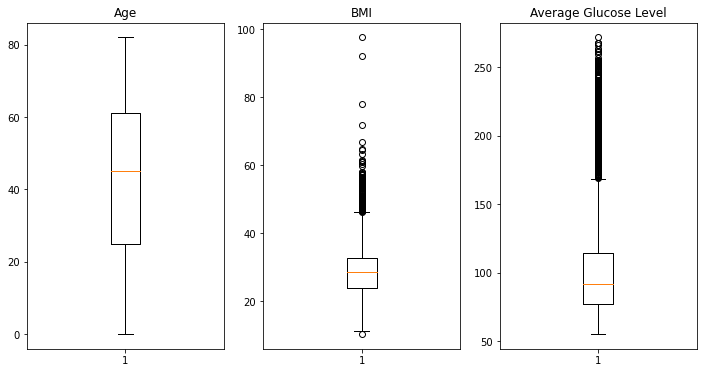

In [342]:
plt.figure(figsize=(12,6))
# Age Boxplot
plt.subplot(1,3,1)
min_age = min(df['age'])
max_age = max(df['age'])

plt.boxplot(df['age'])
plt.title('Age')

print(f'Min Age: {min_age}')
print(f'Max Age: {max_age}')

# BMI Boxplot
plt.subplot(1,3,2)
min_bmi = min(df['bmi'])
max_bmi = max(df['bmi'])

plt.boxplot(df['bmi'])
plt.title('BMI')

print(f'Min BMI: {min_bmi}')
print(f'Max BMI: {max_bmi}')

# Glucose Boxplot
plt.subplot(1,3,3)
min_gluc = min(df['avg_glucose_level'])
max_gluc = max(df['avg_glucose_level'])

plt.boxplot(df['avg_glucose_level'])
plt.title('Average Glucose Level')

print(f'Min Average Glucose Level: {min_bmi}')
print(f'Max Average Glucose Level: {max_bmi}')

plt.show()

In [343]:
underage_count = df['age'].loc[(df['age']) < 18].count()
records = df['age'].count()

print(f'Underage records: {underage_count}')
print(f'Total records: {records}')

Underage records: 856
Total records: 5110


In [344]:
df.drop(df[df.age < 18].index, inplace=True)
df.drop(df[df.bmi > 50].index, inplace=True)
df.drop(df[df.bmi < 15].index, inplace=True)
df.drop(df[df.avg_glucose_level > 180].index, inplace=True)

### 1.4 Transform Data

In [345]:
X = df.drop('stroke', axis=1)
y = df['stroke']

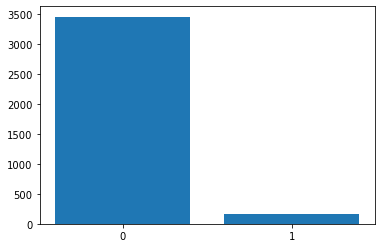

In [346]:
plt.bar(['0','1'], df.groupby('stroke').stroke.count())
plt.show()

In [347]:
X_cols = X.columns

sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(data=X, columns=X_cols)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.775969,-0.322758,4.413641,0.571298,0.491052,-1.264344,1.265081,-0.016611,0.546642,-0.426089,-0.037165,0.714435,-0.473112,0.0,-1.017533,-0.515902,-0.488766,1.195669,-0.477038
1,0.028917,-0.322758,-0.226570,3.288176,0.804903,0.790924,-0.790463,-0.016611,0.546642,-0.426089,-0.037165,0.714435,-0.473112,0.0,0.982769,-0.515902,-0.488766,-0.836352,2.096269
2,1.719613,3.098292,-0.226570,3.408399,-0.913018,0.790924,-0.790463,-0.016611,0.546642,-0.426089,-0.037165,-1.399708,2.113663,0.0,-1.017533,-0.515902,-0.488766,1.195669,-0.477038
3,1.437830,3.098292,4.413641,-0.919220,-0.351390,-1.264344,1.265081,-0.016611,0.546642,-0.426089,-0.037165,0.714435,-0.473112,0.0,-1.017533,-0.515902,-0.488766,1.195669,-0.477038
4,1.156047,-0.322758,-0.226570,0.091653,-1.111240,0.790924,-0.790463,-0.016611,-1.829350,-0.426089,-0.037165,0.714435,-0.473112,0.0,0.982769,-0.515902,-0.488766,1.195669,-0.477038


In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

## 2. The Models

### 2.1 Logistic Regression

In [349]:
lr = LogisticRegression()

classifier_lr = lr.fit(X_train, y_train)

y_pred_lr = classifier_lr.predict(X_test)

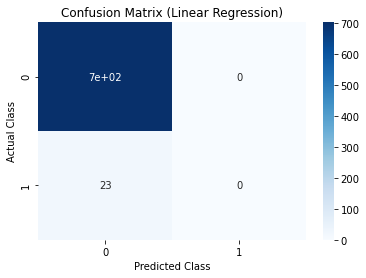

In [350]:
p = sns.heatmap(confusion_matrix(y_test, y_pred_lr), cmap='Blues', annot=True)
p.set_xlabel('Predicted Class')
p.set_ylabel('Actual Class')
plt.title('Confusion Matrix (Linear Regression)')
plt.show()

In [351]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       702
           1       0.00      0.00      0.00        23

    accuracy                           0.97       725
   macro avg       0.48      0.50      0.49       725
weighted avg       0.94      0.97      0.95       725



C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.2 KNN Classifier

In [352]:
knn = KNeighborsClassifier(n_neighbors=5)

classifier_knn = knn.fit(X_train, y_train)

y_pred_knn = classifier_knn.predict(X_test)

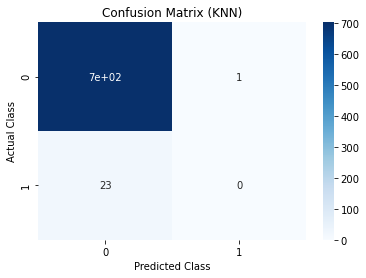

In [353]:
p = sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap='Blues', annot=True)
p.set_xlabel('Predicted Class')
p.set_ylabel('Actual Class')
plt.title('Confusion Matrix (KNN)')
plt.show()

In [354]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       702
           1       0.00      0.00      0.00        23

    accuracy                           0.97       725
   macro avg       0.48      0.50      0.49       725
weighted avg       0.94      0.97      0.95       725



C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.3 Random Forest Classifier

In [355]:
rf = RandomForestClassifier(n_estimators=500, random_state=44)

classifier_rf = rf.fit(X_train, y_train)

y_pred_rf = classifier_rf.predict(X_test)

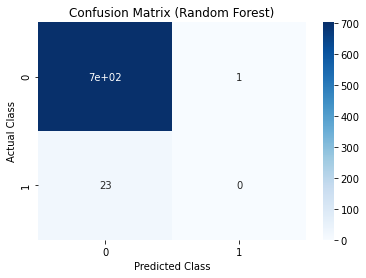

In [356]:
p = sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap='Blues', annot=True)
p.set_xlabel('Predicted Class')
p.set_ylabel('Actual Class')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [357]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       702
           1       0.00      0.00      0.00        23

    accuracy                           0.97       725
   macro avg       0.48      0.50      0.49       725
weighted avg       0.94      0.97      0.95       725



C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### NOTE

While all three models achieve an incredibly high accuracy, looking at the confusion matrix and f1 scores it is obvious that the dataset is so highly imbalanced that simply predicting 'no stroke' will inadvertently achieve very high accuracy.

Therefore, for now, I will stop with the analysis here. And while the model itself does not hold much value as of right now, it hopefully shows my process of building a classification model regardless.

Thank you for reading!